# goals:
- distributions (Population, Spr 17, Sp 16, Black, Fall 16, Hispanic, Fall 17, Followers Count, Friends Count, Listed Count, Favourites Count, Statuses Count)
- value counts (Format, State, Owner, Station, Market Name)
- groups (vs Fall 17 and t-test):
    - twitter vs no_twitter
    - verified vs non_verified
    - by State, Format, Owner
    - by Population groups, Created At groups
- correlation matrix

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats # t-test

In [2]:
df = pd.read_csv('clean_data.csv').drop('Unnamed: 0', axis = 1)
display(df.head(3))

,Format,Population,Spr 17,Spr 16,Black,State,Rank,Fall 16,Hispanic,Owner,Fall 17,Station,Market Name,Followers Count,Friends Count,Listed Count,Created At,Favourites Count,Verified,Statuses Count
0,Country,144700.0,7.5,8.7,11500.0,TX,234,6.3,31500.0,Townsquare,9.3,KEAN-FM,Abilene,2030.0,1754.0,25.0,2010-11-08 20:22:46,191.0,False,10156.0
1,Classic Hits,144700.0,7.5,7.2,11500.0,TX,234,6.3,31500.0,Townsquare,7.9,KULL-FM,Abilene,578.0,475.0,11.0,2010-12-07 17:00:43,25.0,False,21834.0
2,Top 40/M,144700.0,6.8,7.2,11500.0,TX,234,7.7,31500.0,Cumulus,6.6,KCDD-FM,Abilene,235.0,36.0,12.0,2009-12-17 09:53:19,1.0,False,12.0


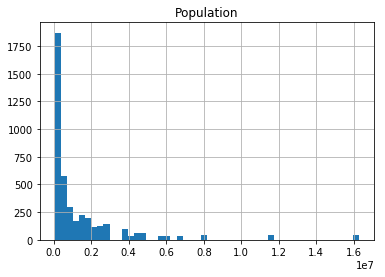

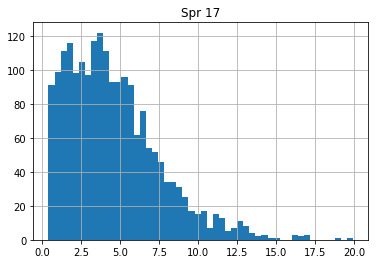

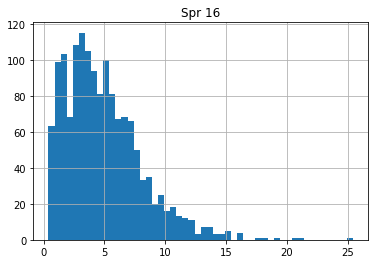

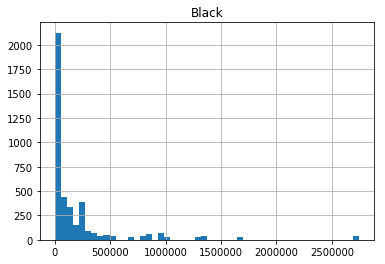

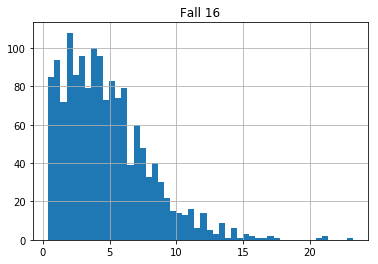

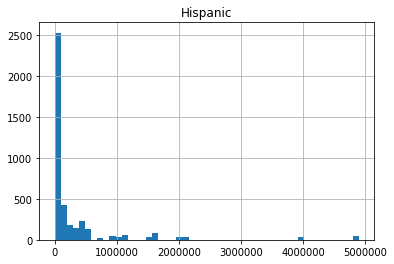

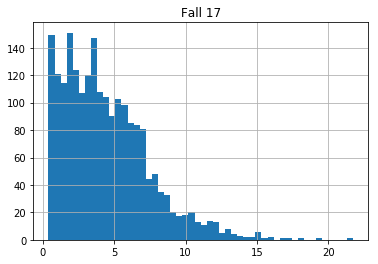

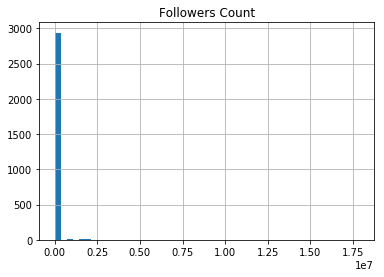

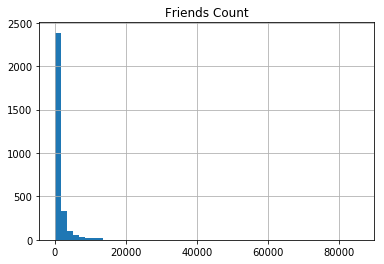

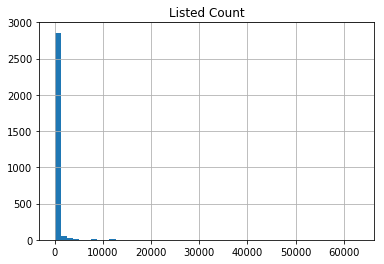

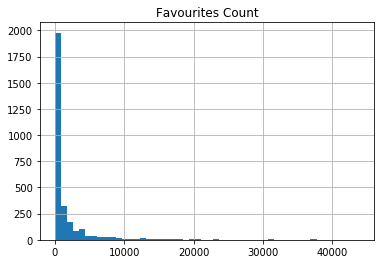

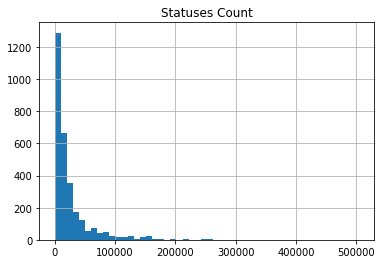

In [3]:
# distributions
for col in df.dtypes[df.dtypes == 'float64'].index:
    df[col].hist(bins = 50)
    plt.title(col)
    plt.show()

In [14]:
# value counts
for col in df.dtypes[df.dtypes == 'object'].index:
    values = df[col].value_counts()
    print ("{} unique {}s".format(len(values.index), col))
    display(values[:10])

59 unique Formats


Country         580
Top 40/M        363
AC              289
Classic Rock    273
Sports          268
Talk            266
N/T             250
Classic Hits    223
Hot AC          205
Top 40/R        120
Name: Format, dtype: int64

52 unique States


CA    393
TX    306
FL    278
NY    263
NC    172
PA    165
IL    120
OH    117
MI    111
IA    105
Name: State, dtype: int64

568 unique Owners


iHeartMedia    890
Cumulus        404
Entercom       302
Townsquare     250
Alpha          119
Cox Radio       67
Midwest         67
Univision       59
Beasley         57
Urban One       50
Name: Owner, dtype: int64

3809 unique Stations


WOR-AM     8
WCBS-AM    8
WABC-AM    7
WINS-AM    7
WAXQ-FM    6
WFAN-FM    6
WNEW-FM    6
WBMP-FM    6
WLTW-FM    6
WSKQ-FM    6
Name: Station, dtype: int64

306 unique Market Names


Portland                          45
Los Angeles                       44
Chicago                           42
Nassau-Suffolk (Long Island)      41
New York                          39
Dallas-Ft. Worth                  38
Phoenix                           37
Miami-Ft. Lauderdale-Hollywood    37
Middlesex-Somerset-Union          36
San Antonio                       35
Name: Market Name, dtype: int64

2374 unique Created Ats


2008-09-15 18:46:34    10
2008-11-24 11:41:18     9
2008-10-15 05:11:21     9
2017-11-17 15:16:26     8
2007-05-04 16:39:39     8
2011-03-29 19:56:09     7
2007-06-04 18:22:03     7
2010-11-29 21:39:20     7
2013-03-06 19:34:18     7
2009-03-02 21:58:22     7
Name: Created At, dtype: int64

# groups (vs Fall 17)

-6.821113769828495
1.4629530494860125e-11
0.8867718911668909


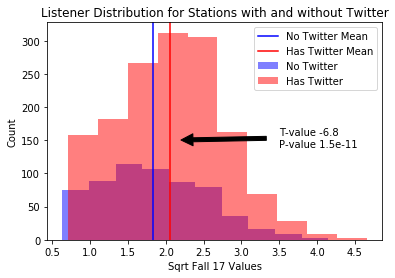

In [26]:
# twitter vs no_twitter
df_no_twitter = df[df['Followers Count'].isnull()]
nt = df_no_twitter['Fall 17'].apply(np.sqrt)
df_twitter = df[~df['Followers Count'].isnull()]
t = df_twitter['Fall 17'].apply(np.sqrt)
# plot
nt.hist(alpha = .5, label = "No Twitter", color = 'b')
t.hist(alpha = .5, label = "Has Twitter", color = 'r')
plt.axvline(nt.mean(), label = "No Twitter Mean", color = 'b')
plt.axvline(t.mean(), label = "Has Twitter Mean", color = 'r')
plt.legend()
plt.title("Listener Distribution for Stations with and without Twitter")
plt.xlabel("Sqrt Fall 17 Values")
plt.ylabel('Count')

# t-test
tval, pval = stats.ttest_ind(nt.dropna(), t.dropna(), equal_var=False)
print (tval)
print (pval)
print ((t**2).mean() - (nt**2).mean())

ax = plt.gca()
ax.annotate('T-value %0.1f\nP-value %0.1e' % (tval,pval), xy=(max([t.mean(), nt.mean()]), 150), xytext=(3.5, 140),
            arrowprops=dict(facecolor='black', shrink=0.1),
            )
ax.grid(False)
plt.savefig('has_twitter_t_test.png', format='png', bbox_inches="tight")
plt.show()

1.0554771409310093
0.29268568451443794
-0.31916521315004065


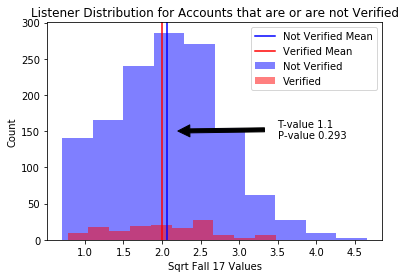

In [27]:
# verified vs non-verified
df_verified = df_twitter[df_twitter['Verified'] == True]
v = df_verified['Fall 17'].apply(np.sqrt)
df_non_verified = df_twitter[~df_twitter['Verified'] == True]
nv = df_non_verified['Fall 17'].apply(np.sqrt)
# plot
nv.hist(alpha = .5, label = "Not Verified", color = 'b')
v.hist(alpha = .5, label = "Verified", color = 'r')
plt.axvline(nv.mean(), label = "Not Verified Mean", color = 'b')
plt.axvline(v.mean(), label = "Verified Mean", color = 'r')
plt.title("Listener Distribution for Accounts that are or are not Verified")
plt.legend()
plt.xlabel("Sqrt Fall 17 Values")
plt.ylabel('Count')

# t-test
tval, pval = stats.ttest_ind(nv.dropna(), v.dropna(), equal_var=False)
print (tval)
print (pval)
print ((v**2).mean() - (nv**2).mean())

ax = plt.gca()
ax.annotate('T-value %0.1f\nP-value %0.3f' % (tval,pval), xy=(max([v.mean(), nv.mean()]), 150), xytext=(3.5, 140),
            arrowprops=dict(facecolor='black', shrink=0.1),
            )
ax.grid(False)
plt.savefig('is_verified_t_test.png', format='png')
plt.show()

In [7]:
# t-test by State, Owner, Format



In [8]:
# is t-test robust to transformations?
a = list(range(1,100))
b = list(range(202,401, 2))
tval, pval = stats.ttest_ind(a, b, equal_var=False)
print (tval)
print (pval)
tval_sqrt, pval_sqrt = stats.ttest_ind(np.sqrt(a), np.sqrt(b), equal_var=False)
print (tval_sqrt)
print (pval_sqrt)
tval_log, pval_log = stats.ttest_ind(np.log(a), np.log(b), equal_var=False)
print (tval_log)
print (pval_log)
# kind of? maintains results, but varies slightly

-38.73014084048507
2.1653799039479843e-78
-36.707105279004594
3.7157559901464016e-85
-21.619444602375786
8.262908595782381e-41


In [9]:
# t-test by Population groups, Created At groups




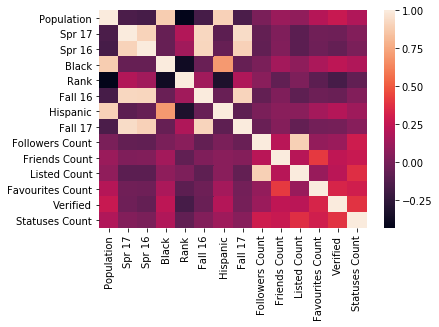

In [10]:
# correlation matrix
sns.heatmap(df.corr())
plt.show()